In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv",index_col = "date")
df.shape

(1304, 1)

(1304, 1)


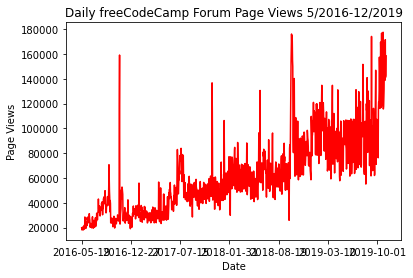

In [14]:
q_1 = df["value"].quantile(q=0.025)
q_2 = df["value"].quantile(q=0.975)

df2 = df[(df["value"] >= q_1) & (df["value"] <= q_2)]

print(df.shape)

df2.plot(color = "red", legend = False)
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.show()

In [4]:
df2_bar = df2.copy()
df2_bar["year"] = pd.DatetimeIndex(df2_bar.index).year
df2_bar["month"] = pd.DatetimeIndex(df2_bar.index).month
df2_bar = df2_bar.groupby(["year", "month"])["value"].mean()

df2_bar

year  month
2016  5         19432.400000
      6         21875.105263
      7         24109.678571
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       111378.142857
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

In [5]:
df2_bar = df2_bar.unstack()
df2_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


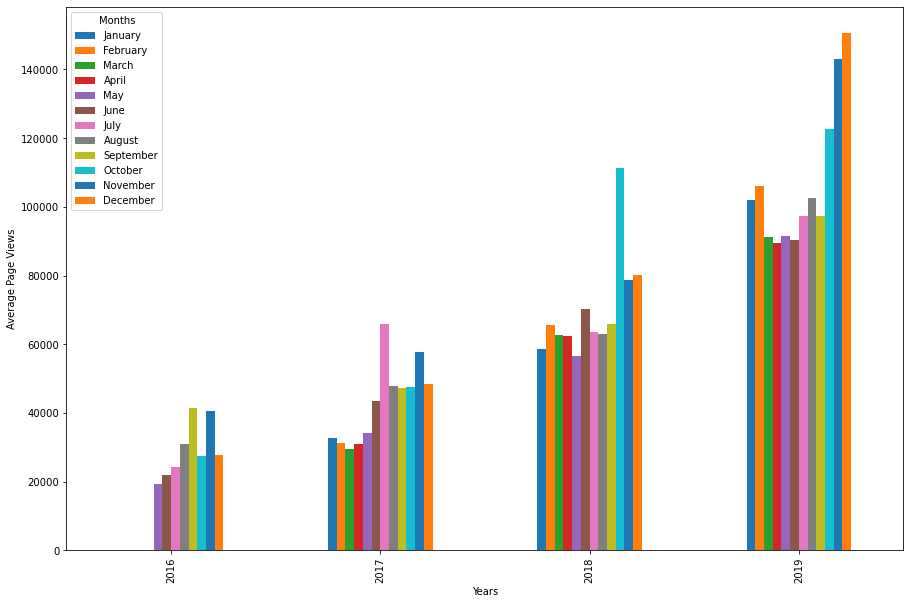

In [6]:


# Draw bar plot
fig = df2_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
plt.xlabel("Years", fontsize= 10)
plt.ylabel("Average Page Views", fontsize= 10)
#plt.xticks(rotation=30)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [7]:
df2_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


In [8]:
df2_bar = df2_bar[sorted(df2_bar.columns)]
df2_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


In [9]:
# draw bar_plot

df["year"] = pd.DatetimeIndex(df.index).year
df["month"] = pd.DatetimeIndex(df.index).month
df2 = df.groupby(["year","month"], sort = False).mean()
df2 = df2.reset_index()
df2

,year,month,value
0,2016,5,11242.695652
1,2016,6,19124.366667
2,2016,7,23314.225806
3,2016,8,31049.193548
4,2016,9,41476.866667
5,2016,10,27398.322581
6,2016,11,40448.633333
7,2016,12,27832.419355
8,2017,1,32785.161290
9,2017,2,31113.071429


Text(0.5, 20.80000000000002, 'Years')

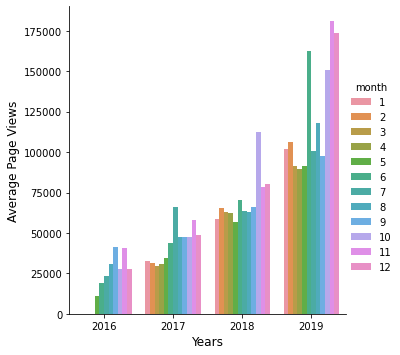

In [10]:

sns.catplot(x = "year", y = "value", hue = "month", kind = "bar", data = df2)

  
# Set label for y-axis
plt.ylabel( "Average Page Views" , size = 12 )
plt.xlabel( "Years" , size = 12 )
# Set title for figure

  
# Display figure


In [11]:
q_1 = df["value"].quantile(q=0.025)
q_2 = df["value"].quantile(q=0.975)

df3 = df[(df["value"] > q_1) & (df["value"] < q_2)]
len(df3)

1238

Text(0.5, 20.80000000000002, 'Years')

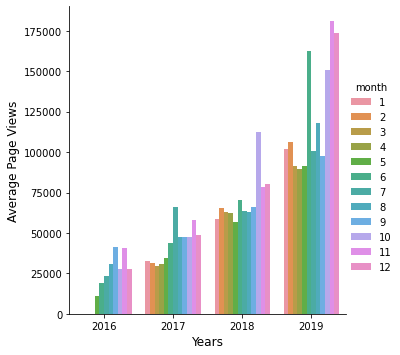

In [12]:
sns.catplot(x = "year", y = "value", hue = "month", kind = "bar", data = df2)

  
# Set label for y-axis
plt.ylabel( "Average Page Views" , size = 12 )
plt.xlabel( "Years" , size = 12 )
# Set title for figure

In [12]:
df_box = df.copy()
df_box["year"] = pd.DatetimeIndex(df.index).year
df_box["month"] = pd.DatetimeIndex(df.index).month_name()
df_box["month"] = df_box["month"].str[:3]
df_box.reset_index(inplace = True)
df_box

,date,value,year,month
0,2016-05-09,1201,2016,May
1,2016-05-10,2329,2016,May
2,2016-05-11,1716,2016,May
3,2016-05-12,10539,2016,May
4,2016-05-13,6933,2016,May
...,...,...,...,...
1299,2019-11-29,171584,2019,Nov
1300,2019-11-30,141161,2019,Nov
1301,2019-12-01,142918,2019,Dec
1302,2019-12-02,220144,2019,Dec


Text(0, 0.5, 'Page Views')

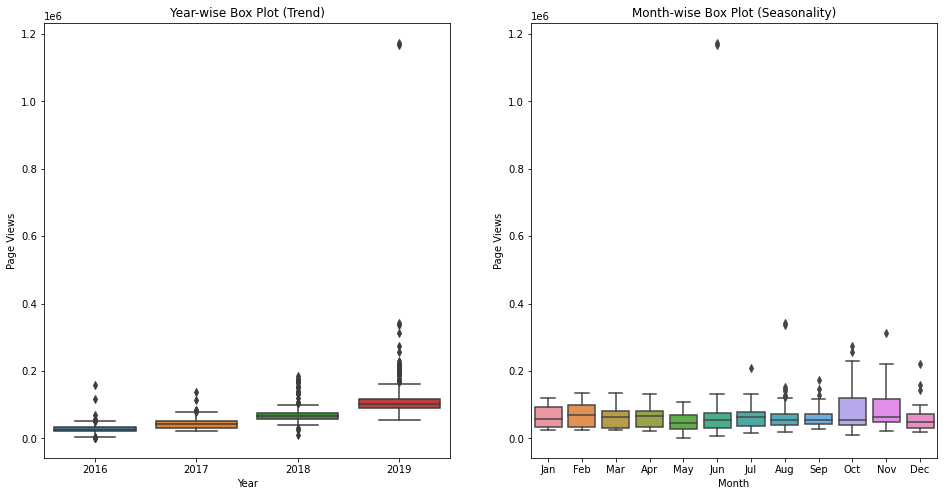

In [13]:
fig, axes = plt.subplots(1, 2, figsize= (16,8))

sns.boxplot(ax = axes[0], data = df_box, x = "year", y = "value")
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
         "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

sns.boxplot(data=df_box, x="month", y="value", order = order, ax=axes[1])

axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")